In [34]:
from keras.layers import Dense,Activation
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical
import random
from sklearn.model_selection import train_test_split

(1783, 5, 10)

In [92]:
SEQLEN=10
STEP=1

directory=np.load("../data/generate_data/directory")
#directory=to_categorical(directory,num_classes=10)


input_directory=[]
label_directory=[]
for i in range(0,len(directory)-SEQLEN-1,STEP):
    input_directory.append(directory[i+1:i+SEQLEN+1]-directory[i:i+SEQLEN])
    label_directory.append(directory[i+SEQLEN+1]-directory[i+SEQLEN])

    
input_directory=to_categorical(input_directory,num_classes=10)
label_directory=to_categorical(label_directory,num_classes=10)
label_directory=label_directory.reshape(1772,50)
input_directory=input_directory.reshape(1772,10,50)

#label_directory
label_directory.shape,input_directory.shape

((1772, 50), (1772, 10, 50))

In [93]:
Xtrain,Xtest,ytrain,ytest=train_test_split(input_directory,label_directory,test_size=0.2,random_state=42)
Xtrain.shape,ytrain.shape

((1417, 10, 50), (1417, 50))

In [105]:
HIDDEN_SIZE=2
BATCH_SIZE=32

model=Sequential()
model.add(SimpleRNN(HIDDEN_SIZE,return_sequences=False,input_shape=(10,50),unroll=True))
model.add(Dense(50))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['acc'])

In [106]:
plot_model(model,to_file="../img/directory_SimpleRNN_model.png",show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_11 (SimpleRNN)    (None, 2)                 106       
_________________________________________________________________
dense_9 (Dense)              (None, 50)                150       
_________________________________________________________________
activation_9 (Activation)    (None, 50)                0         
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [107]:
history=model.fit(Xtrain,ytrain,batch_size=BATCH_SIZE,epochs=20,validation_data=(Xtest,ytest))

Train on 1417 samples, validate on 355 samples
Epoch 1/20
1417/1417 [==============================] - 1s 393us/step - loss: 19.1203 - acc: 0.7841 - val_loss: 18.6197 - val_acc: 0.9944
Epoch 2/20
1417/1417 [==============================] - 0s 98us/step - loss: 18.1959 - acc: 0.9922 - val_loss: 17.7303 - val_acc: 0.9944
Epoch 3/20
1417/1417 [==============================] - 0s 138us/step - loss: 17.3313 - acc: 0.9922 - val_loss: 16.8973 - val_acc: 0.9944
Epoch 4/20
1417/1417 [==============================] - 0s 133us/step - loss: 16.5293 - acc: 0.9922 - val_loss: 16.1332 - val_acc: 0.9944
Epoch 5/20
1417/1417 [==============================] - 0s 149us/step - loss: 15.7970 - acc: 0.9922 - val_loss: 15.4382 - val_acc: 0.9944
Epoch 6/20
1417/1417 [==============================] - 0s 125us/step - loss: 15.1384 - acc: 0.9922 - val_loss: 14.8176 - val_acc: 0.9944
Epoch 7/20
1417/1417 [==============================] - 0s 140us/step - loss: 14.5511 - acc: 0.9922 - val_loss: 14.2635 - val_

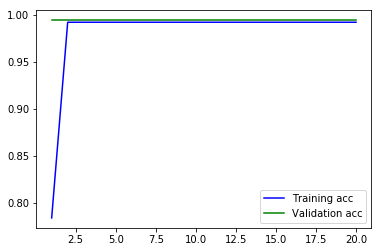

In [108]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'b',label="Training acc")
plt.plot(epochs,val_acc,'g',label="Validation acc")
#plt.plot(epochs,loss,'r',label="Training loss")
#plt.plot(epochs,val_loss,'y',label="validation loss")

plt.legend()
#plt.figure()
plt.savefig("../img/directory_SimpleRNN.png")
#plt.show()

In [109]:
model.save("../model/directory_SimpleRNN.h5")
model_r=load_model("../model/directory_SimpleRNN.h5")

In [114]:
directory_global=[[0]*5]*11

In [113]:
directory_global=directory_global[1:]
directory_global.append([1,1,0,0,1])


[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [129]:
import predict
import imp
imp.reload(predict)

<module 'predict' from '/home/drdh/lx/X-dll/LSTM/model/model_src/predict.py'>

In [132]:
predict.network([10,11,12,3],36,1,[1,1,0,0,3],34,1,1,[18,6,2,17],[18,6,2,7],[18,6,2,7],1)

([0, 0, 0, 1, 2, 0, 0, 0, 0, 0],
 1,
 0,
 [0, 0, 0, 0, 0],
 -4,
 1,
 0,
 [0, 0, 0, 0],
 [0, 0, 0, 1],
 [0, 0, 1, 0],
 1)